# Linear Regression

## 线性方程
$y = mx + b$ 
### MSE均方误差：

- 均方误差：预测值和真实值的偏差

<img src="./MSE.png" alt="MSE公式" width="30%" height="25%" align="left">

### Gradient Descent 梯度下降：

- 线性方程y=mx+b，不同的系数m 和 b ,对真实数据点有不用的MSE
- 对MSE中的系数m,b分别求导，找到MSE下降最快的方向，即MSE下降最快，数值最小的方向，从而误差最小。

<img src="m_b_gradient.png" alt="mse_gradient_descent" width=60% align="left">

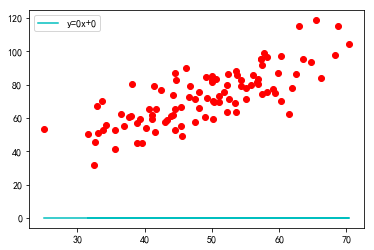

Start linear regression：y=0x+0, MSE=5565.107834483211


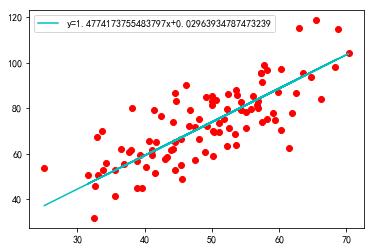

End linear regression：y=0x+0, MSE=112.65585181499746


In [179]:
import numpy as np
import matplotlib.pyplot as plt


def MSE_LinearReg(m,b,dataset):
    """ 查看MSE，绘制拟合线性模型
    """
    
    x_list = []
    y_list = []
    
    se_sum = 0
    for i in range(0,len(dataset)):
        x = dataset[i,0]  # 第i行，第0列的数据，或者dataset[0][0])
        y = dataset[i,1]
        plt.plot(x,y,"ro") # plt.scatter(x,y,color="r")
        se_sum += (y - (m * x + b)) ** 2
        
        x_list.append(x)  # 拟合线 y =m*x+b
        y_list.append(m*x+b)
    
    plt.plot(x_list,y_list, 'c-',label="y={m}x+{b}".format(m=m,b=b))  
    plt.legend()
    plt.show()
    return se_sum/float(len(dataset))


def Gradient_Step(m, b, dataset, learning_rate):
    """求y=mx+b的MSE的梯度下降，使得MSE变小（误差变小），从而得到合适的系数m和b
    通过learning_rate， 控制梯度下降的步伐
    """
    m_gradient = 0  # m在MSE中的导数 
    b_gradient = 0  # b在MSE中的导数
    dataset_len = float(len(dataset))
    for i in range(0,len(dataset)):
        x,y = dataset[i,0],dataset[i,1]
        m_gradient += -2/dataset_len *x*(y - (m * x + b))  
        b_gradient += -2/dataset_len * (y - (m * x + b))
    new_m = m - learning_rate*m_gradient
    new_b = b - learning_rate*b_gradient
    return new_m,new_b
    
def GradientDescent_LinearReg_MSE(m, b, dataset,learning_rate, num_iterations):
    """通过num_iterations次迭代，使得梯度下降稳定在合适的位置，得到最小的MSE，同时获得最好的m,b。
    """
    for i in range(num_iterations):
        m,b = Gradient_Step(m, b, dataset, learning_rate) # 每次迭代，都更新m,b
    return m, b 

def run():
    dataset = np.genfromtxt("data.csv", delimiter=",")  # 返回的是numpy.ndarray 包含(x,y)点的数据集合
    learning_rate = 0.0001  # 梯段下降速率
    initial_m,initial_b = 0,0  # y = mx + b
    num_iterations = 10  # 迭代次数，每一次梯度下降的调整次数
    print("Start linear regression：y={m}x+{b}, MSE={mse}".format(m=initial_m, b=initial_b, mse=MSE_LinearReg(initial_m,initial_b,dataset)))
    m,b = GradientDescent_LinearReg_MSE(initial_m,initial_b,dataset,learning_rate, num_iterations)
    print("End linear regression：y={m}x+{b}, MSE={mse}".format(m=initial_m, b=initial_b, mse=MSE_LinearReg(m,b,dataset)))
run()